In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0)

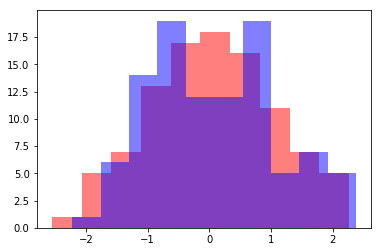

In [3]:
dis1 = np.random.randn(100,1) ;  dis2 = np.random.randn(100,1); plt.hist(dis1,color='Red',alpha=0.5) ; plt.hist(dis2,color='Blue',alpha=0.5) ; plt.show()

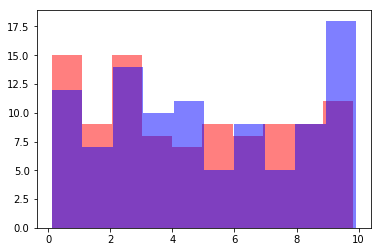

[[9.61936379 2.92147527 2.4082878 ]] [[3.92675677 9.56405723 1.87130892]]


In [4]:
dis1 = np.random.uniform(low=0,high=10,size=(100,1)) ;  dis2 = np.random.uniform(low=0,high=10,size=(100,1))
plt.hist(dis1,color='Red',alpha=0.5) ; plt.hist(dis2,color='Blue',alpha=0.5) ; plt.show()
print(dis1[:3].T,dis2[:3].T)

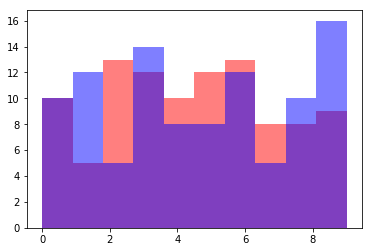

[7 8 2] [6 8 6]


In [5]:
elements      = [0,1,2,3,4,5,6,7,8,9,10]
probabilities = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.0]
dis1 = np.random.choice(elements, 100, p=probabilities) ; dis2 = np.random.choice(elements, 100, p=probabilities)
plt.hist(dis1,color='Red',alpha=0.5); plt.hist(dis2,color='Blue',alpha=0.5) ; plt.show()
print(dis1[:3].T,dis2[:3].T)

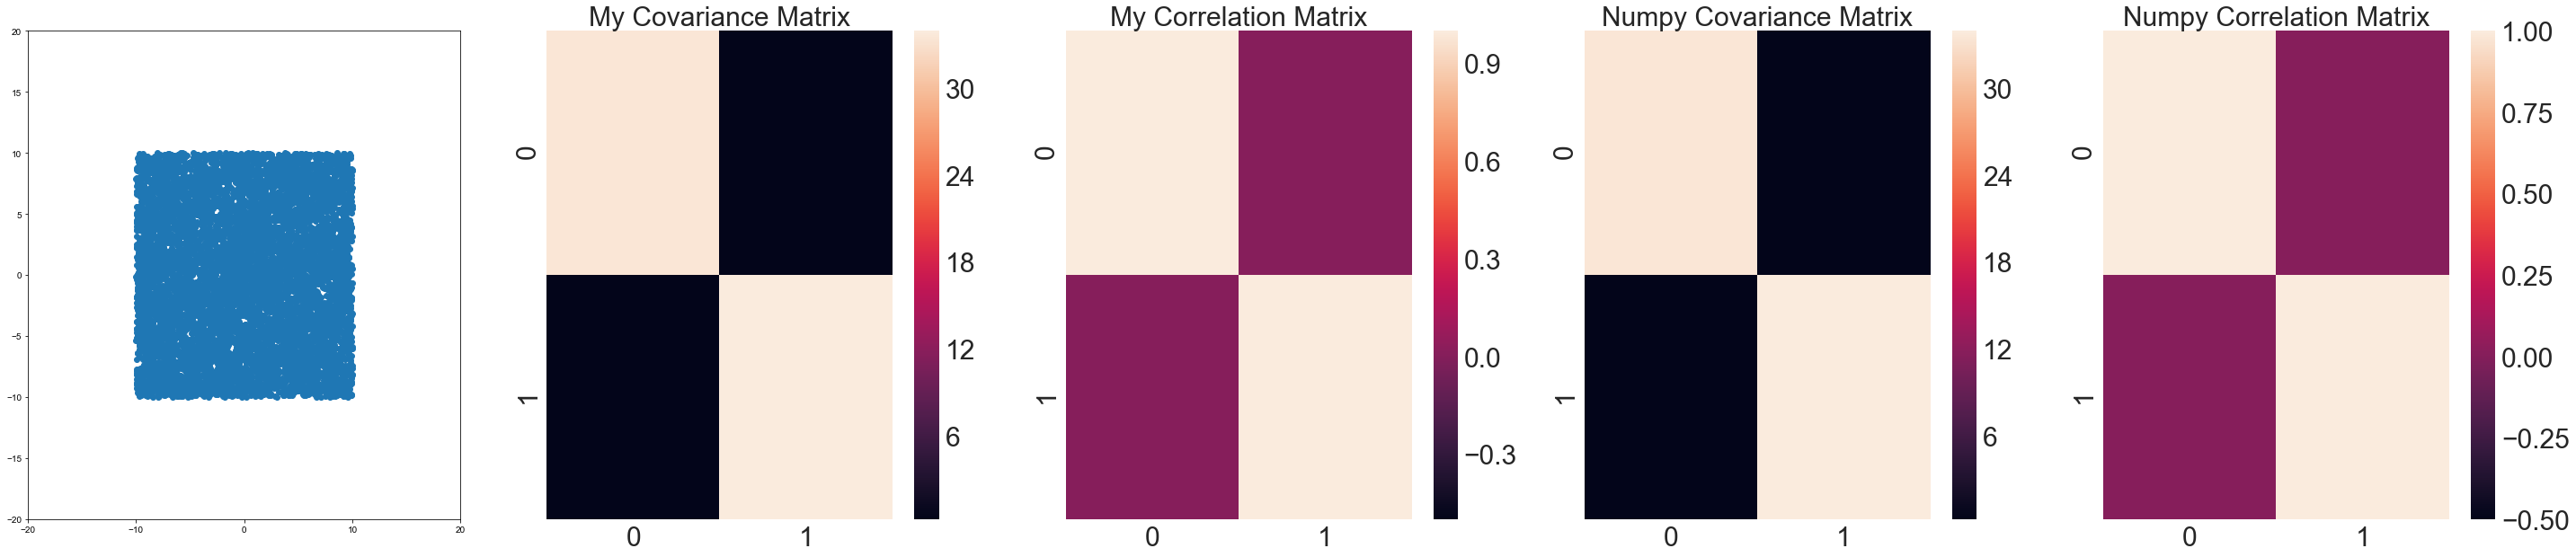

In [6]:
dis1 = np.random.uniform(low=-10,high=10,size=(9000,1)) ;  dis2 = np.random.uniform(low=-10,high=10,size=(9000,1))
plt.figure(figsize=(50,10))

plt.subplot(151); plt.xlim(-20,20);plt.ylim(-20,20); plt.scatter(dis1,dis2)

dis_all = np.hstack((dis1,dis2))
dis_all = (dis_all - dis_all.mean(0))
covariance_mat = dis_all.T @ dis_all / (dis_all.shape[0])

dis_all = dis_all / dis_all.std(0)
correlation_mat= dis_all.T @ dis_all / (dis_all.shape[0])

sns.set(font_scale=3.)
plt.subplot(152); sns.heatmap(covariance_mat);   plt.title('My Covariance Matrix',fontsize=30);
plt.subplot(153); sns.heatmap(correlation_mat,vmin=-0.5); plt.title('My Correlation Matrix',fontsize=30);

dis_all = np.hstack((dis1,dis2))
plt.subplot(154); sns.heatmap(np.cov(dis_all.T));       plt.title('Numpy Covariance Matrix',fontsize=30);
plt.subplot(155); sns.heatmap(np.corrcoef(dis_all.T) ,vmin=-0.5); plt.title('Numpy Correlation Matrix',fontsize=30);
plt.show()

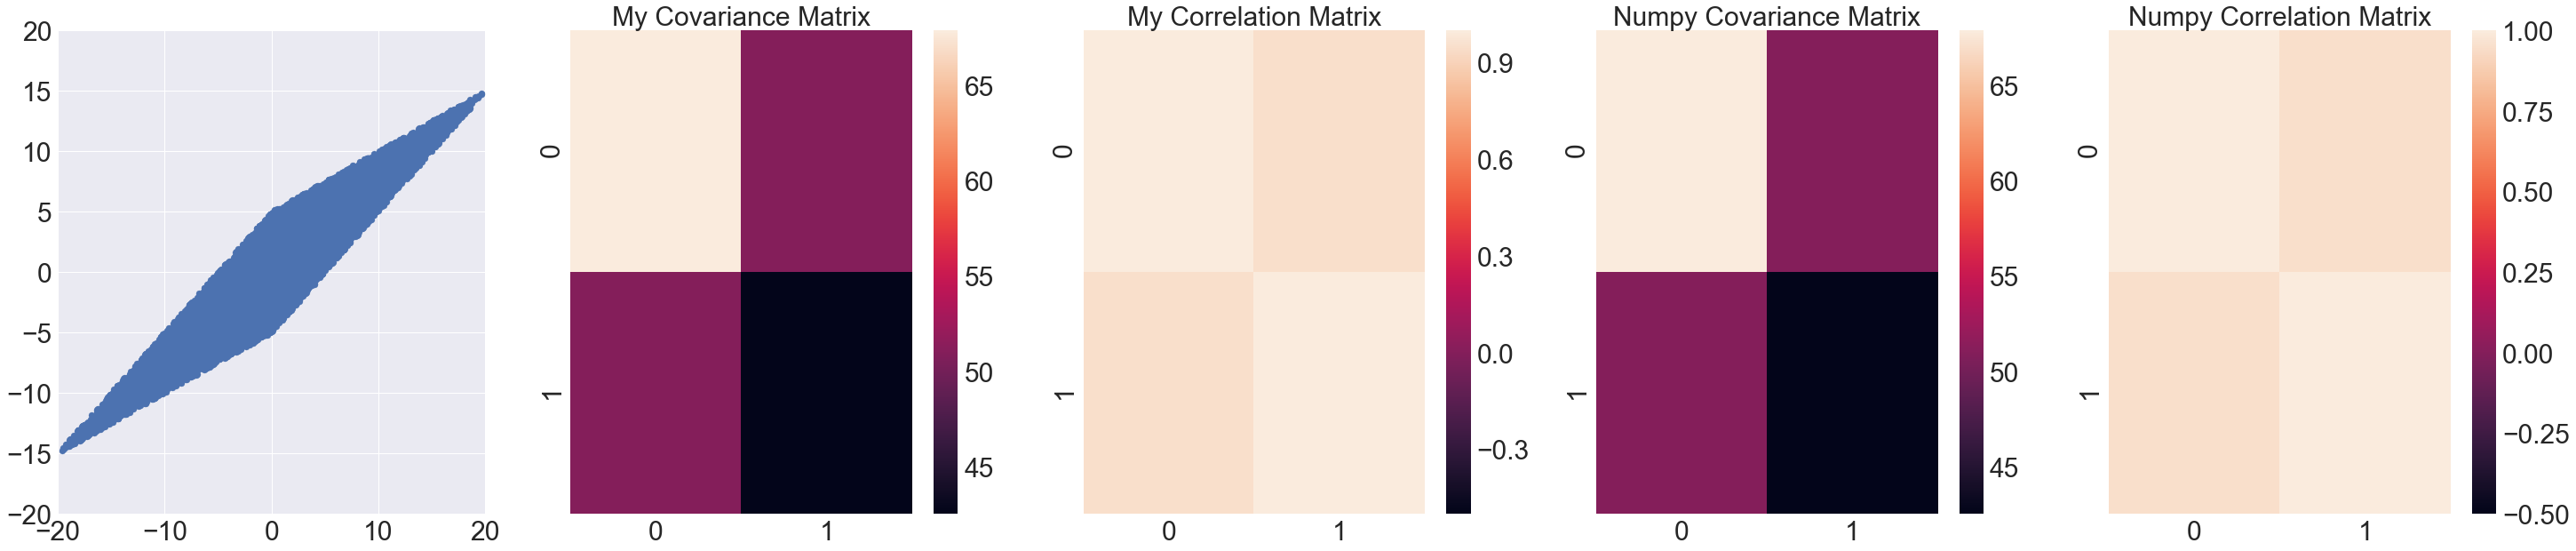

In [7]:
dis_all = np.hstack((dis1,dis2))
mix_matrix = np.array([
    [1,0.5],
    [1,1]
])
dis_mixed = dis_all @ mix_matrix

plt.figure(figsize=(50,10))
plt.subplot(151); plt.xlim(-20,20);plt.ylim(-20,20); plt.scatter(dis_mixed[:,0],dis_mixed[:,1])

dis_all = dis_mixed
dis_all = (dis_all - dis_all.mean(0))
covariance_mat = dis_all.T @ dis_all / (dis_all.shape[0])

dis_all = dis_all / dis_all.std(0)
correlation_mat= dis_all.T @ dis_all / (dis_all.shape[0])
sns.set(font_scale=3.)
plt.subplot(152); sns.heatmap(covariance_mat);   plt.title('My Covariance Matrix',fontsize=30);
plt.subplot(153); sns.heatmap(correlation_mat,vmin=-0.5);  plt.title('My Correlation Matrix',fontsize=30);

dis_all = np.hstack((dis1,dis2))
dis_mixed = dis_all @ mix_matrix
plt.subplot(154); sns.heatmap(np.cov(dis_mixed.T));       plt.title('Numpy Covariance Matrix',fontsize=30);
plt.subplot(155); sns.heatmap(np.corrcoef(dis_mixed.T),vmin=-0.5 ); plt.title('Numpy Correlation Matrix',fontsize=30);
plt.show()

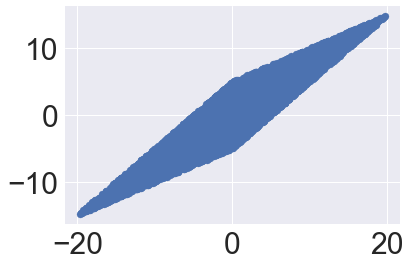

In [8]:
# preprocess the data
dis_all = np.hstack((dis1,dis2))
mix_matrix = np.array([[1,0.5],[1,1]])
dis_mixed = dis_all @ mix_matrix
plt.scatter(dis_mixed[:,0],dis_mixed[:,1]);plt.show()

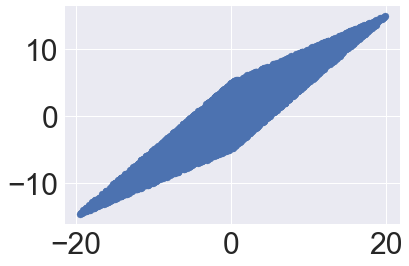

In [9]:
dis_mixed_cen = dis_mixed - dis_mixed.mean(0)
plt.scatter(dis_mixed_cen[:,0],dis_mixed_cen[:,1]);plt.show()

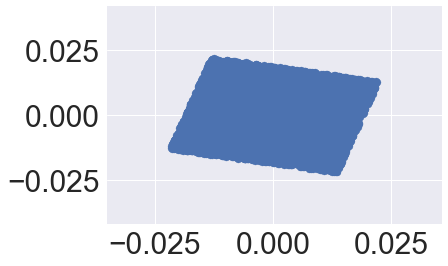

In [10]:
cov = np.dot(dis_mixed_cen.T, dis_mixed_cen)
#   d = (lambda1, lambda2, ..., lambdaN)
d, E = np.linalg.eigh(cov)
#   D = diag(d) ^ (-1/2)
D = np.diag(1. / np.sqrt(d + 10e-5))
#   W_zca = E * D * E.T
W = np.dot(np.dot(E, D), E.T)
X_white = np.dot(dis_mixed_cen, W)
plt.scatter(X_white[:,0],X_white[:,1]);plt.show()

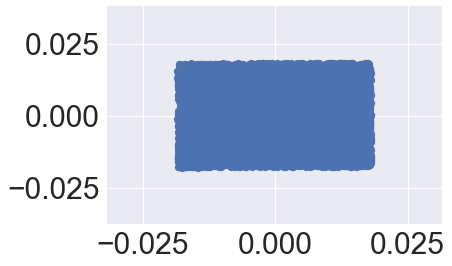

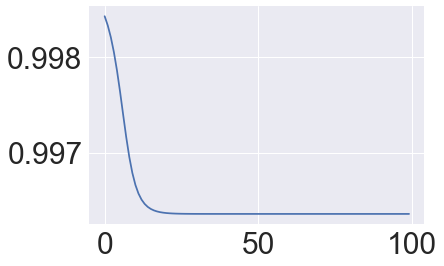

In [572]:

def _cube(x):
    return x ** 3, (3 * x ** 2).mean(axis=0)

def _sym_decorrelation(W):
    """ Symmetric decorrelation
    i.e. W <- (W * W.T) ^{-1/2} * W
    """
    s, u = np.linalg.eigh(np.dot(W, W.T))
    # u (resp. s) contains the eigenvectors (resp. square roots of
    # the eigenvalues) of W * W.T
    return np.dot(np.dot(u * (1. / np.sqrt(s)), u.T), W)

np.random.seed(40)
# 20 - good choice 
# 40 - good choice
unmixing_matrix = _sym_decorrelation(np.random.randn(2,2))

all_w1_values = []
for _ in range(100):
    gwtx, g_wtx = _cube(X_white @ unmixing_matrix  )
    W1 = _sym_decorrelation(np.dot(gwtx.T, X_white) / X_white.shape[1]   - g_wtx[:,np.newaxis]  * unmixing_matrix)
    lim = max(abs(abs(np.diag(np.dot(W1, W.T))) - 1))
    all_w1_values.append(lim)
    unmixing_matrix = W1
        
final = X_white @ unmixing_matrix
plt.scatter(final[:,0],final[:,1]);plt.show()
plt.plot(all_w1_values);plt.show()

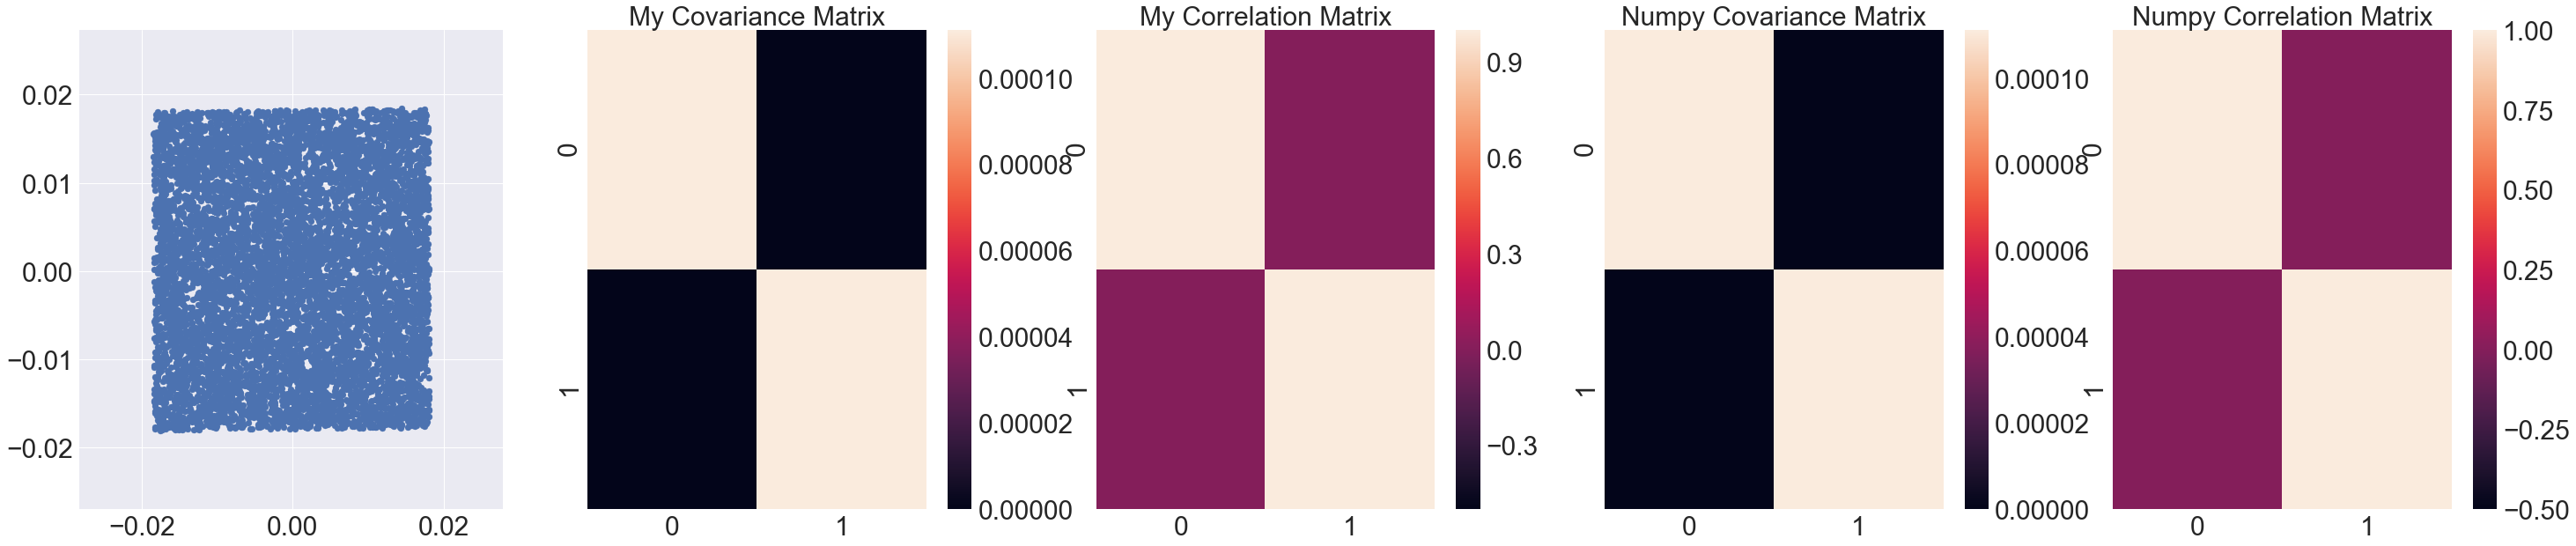

In [12]:
plt.figure(figsize=(50,10))
plt.subplot(151);  plt.scatter(final[:,0],final[:,1])

dis_all = final
dis_all = (dis_all - dis_all.mean(0))
covariance_mat = dis_all.T @ dis_all / (dis_all.shape[0])

dis_all = dis_all / dis_all.std(0)
correlation_mat= dis_all.T @ dis_all / (dis_all.shape[0])
sns.set(font_scale=3.)
plt.subplot(152); sns.heatmap(covariance_mat);   plt.title('My Covariance Matrix',fontsize=30);
plt.subplot(153); sns.heatmap(correlation_mat,vmin=-0.5);  plt.title('My Correlation Matrix',fontsize=30);

plt.subplot(154); sns.heatmap(np.cov(final.T));       plt.title('Numpy Covariance Matrix',fontsize=30);
plt.subplot(155); sns.heatmap(np.corrcoef(final.T),vmin=-0.5 ); plt.title('Numpy Correlation Matrix',fontsize=30);
plt.show()

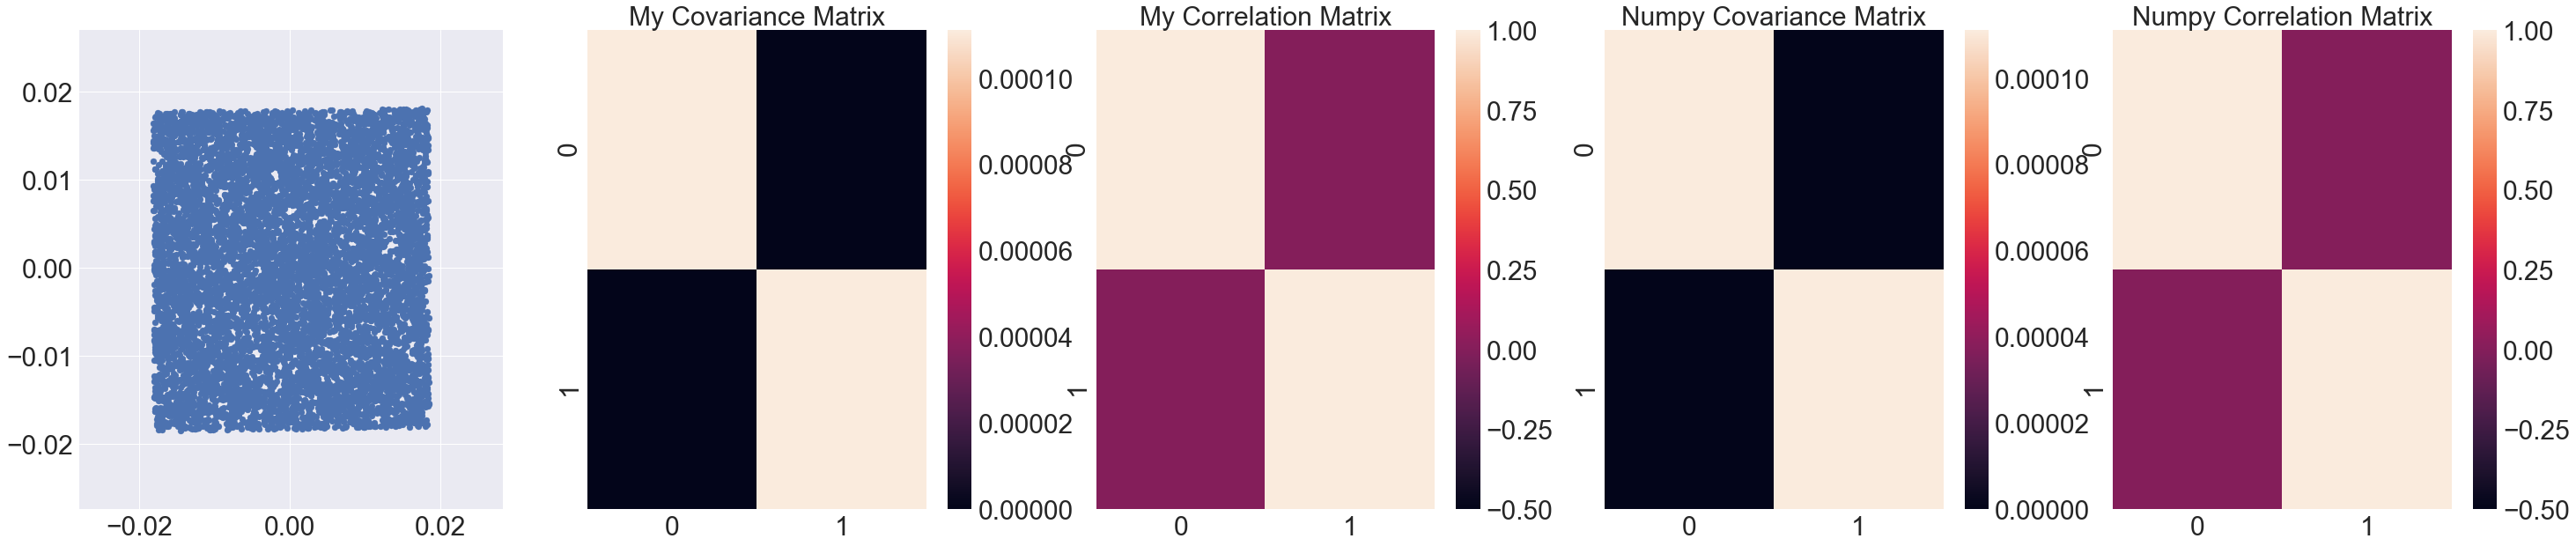

In [13]:
from sklearn.decomposition import FastICA
sk_ica = FastICA()
temp = sk_ica.fit_transform(dis_mixed)

plt.figure(figsize=(50,10)); plt.subplot(151);  plt.scatter(temp[:,0],temp[:,1])

dis_all = temp
dis_all = (dis_all - dis_all.mean(0))
covariance_mat = dis_all.T @ dis_all / (dis_all.shape[0])

dis_all = dis_all / dis_all.std(0)
correlation_mat= dis_all.T @ dis_all / (dis_all.shape[0])
sns.set(font_scale=3.)
plt.subplot(152); sns.heatmap(covariance_mat);   plt.title('My Covariance Matrix',fontsize=30);
plt.subplot(153); sns.heatmap(correlation_mat,vmin=-0.5);  plt.title('My Correlation Matrix',fontsize=30);

plt.subplot(154); sns.heatmap(np.cov(temp.T));       plt.title('Numpy Covariance Matrix',fontsize=30);
plt.subplot(155); sns.heatmap(np.corrcoef(temp.T),vmin=-0.5 ); plt.title('Numpy Correlation Matrix',fontsize=30);
plt.show()

In [87]:
# import the MNIST Data
import tensorflow as tf
import numpy as np
import sys, os,cv2
from sklearn.utils import shuffle
from scipy.misc import imread,imresize
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from skimage.transform import resize
from imgaug import augmenters as iaa
import imgaug as ia
from scipy.ndimage import zoom
import seaborn as sns
from scipy import linalg as LA

np.random.seed(0)
np.set_printoptions(precision = 3,suppress =True)
old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)
from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets('../../Dataset/MNIST/', one_hot=True)
mnist = input_data.read_data_sets('../../Dataset/fashionmnist/',one_hot=True)
train_data, train_label, test_data, test_label = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

Extracting ../../Dataset/fashionmnist/train-images-idx3-ubyte.gz
Extracting ../../Dataset/fashionmnist/train-labels-idx1-ubyte.gz
Extracting ../../Dataset/fashionmnist/t10k-images-idx3-ubyte.gz
Extracting ../../Dataset/fashionmnist/t10k-labels-idx1-ubyte.gz


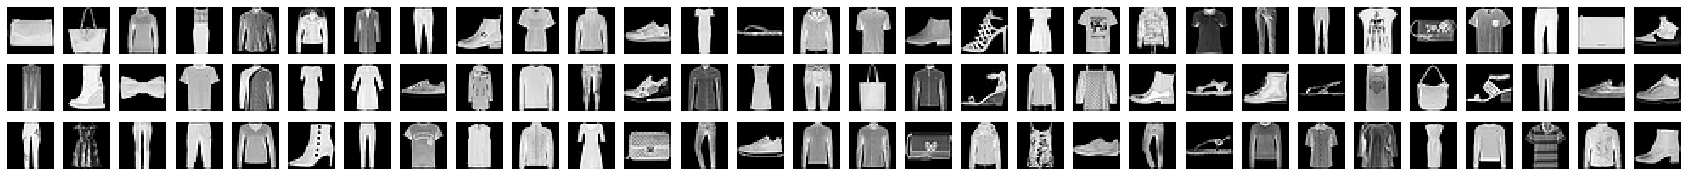

In [88]:

def showimages(x,coloums=30,row=3,col=False):
    fig=plt.figure(figsize=(30, 3))
    columns = coloums; rows = row
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        if col: plt.imshow(np.squeeze(x[i-1]))
        else:   plt.imshow(np.squeeze(x[i-1]),cmap='gray')
        plt.tick_params(axis='both', left=False, top=False, right=False, bottom=False, labelleft=False, labeltop=False, labelright=False, labelbottom=False)
        plt.grid(False)
    plt.show()
train_data = shuffle(train_data)
sns.set(font_scale=1.)
showimages(train_data.reshape(train_data.shape[0],28,28))

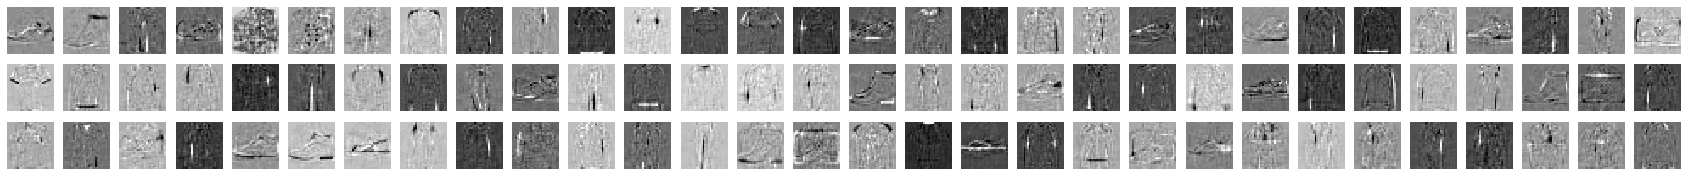

In [89]:
sk_ica = FastICA(n_components=90,algorithm='parallel',fun='logcosh',max_iter=200)
temp   = sk_ica.fit_transform(train_data[:90,:].T).T
showimages(temp.reshape(temp.shape[0],28,28))

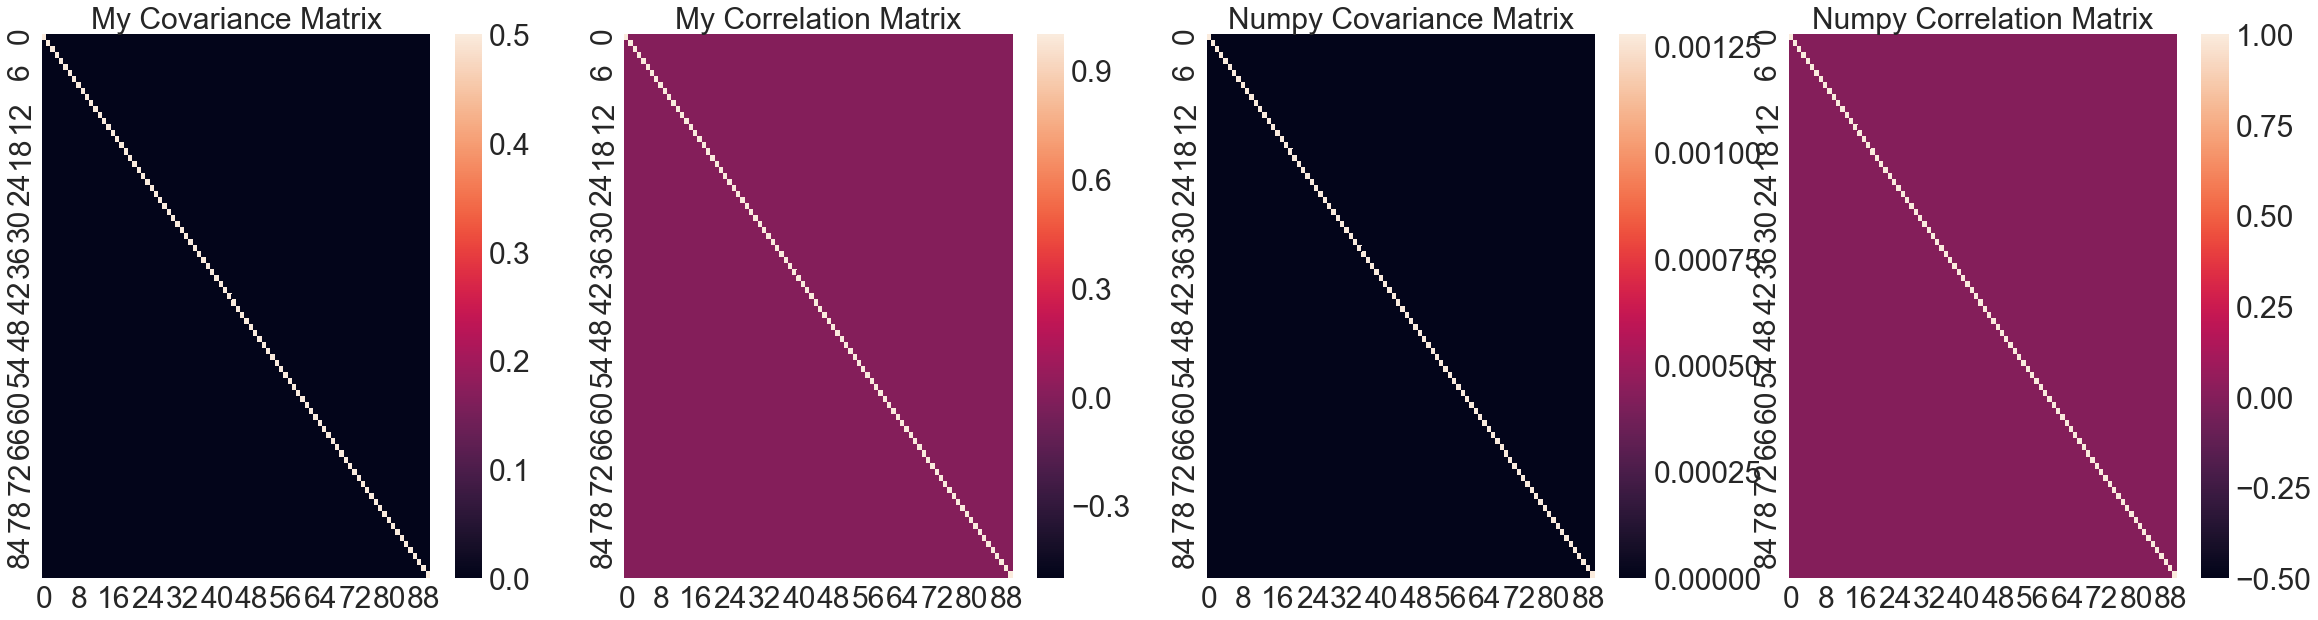

In [90]:
# 
plt.figure(figsize=(40,10))
temp_cen = temp - temp.mean(1)[:,None]
covariance_mat = temp_cen @ temp_cen.T / (dis_all.shape[1])

temp_cen_std = temp_cen / temp_cen.std(1)[:,None]
correlation_mat= temp_cen_std @ temp_cen_std.T / (temp_cen_std.shape[1])
sns.set(font_scale=3.)
plt.subplot(141); sns.heatmap(covariance_mat);   plt.title('My Covariance Matrix',fontsize=30);
plt.subplot(142); sns.heatmap(correlation_mat,vmin=-0.5);  plt.title('My Correlation Matrix',fontsize=30);

plt.subplot(143); sns.heatmap(np.cov(temp));       plt.title('Numpy Covariance Matrix',fontsize=30);
plt.subplot(144); sns.heatmap(np.corrcoef(temp),vmin=-0.5 ); plt.title('Numpy Correlation Matrix',fontsize=30);
plt.show()

In [96]:
# Get the certain STL 10 Data
from skimage import util 
data_location = "../../Dataset/STL10/img/2/"
train_data = []  # create an empty list
for dirName, subdirList, fileList in sorted(os.walk(data_location)):
    for filename in fileList:
        if ".png" in filename.lower() :
            train_data.append(os.path.join(dirName,filename))

import warnings
warnings.filterwarnings("ignore")
image_resize_px = 64
train_batch = np.zeros(shape=(len(train_data),image_resize_px,image_resize_px,3))
for file_index in range(len(train_data)):
    train_batch[file_index] = resize(imread(train_data[file_index]),(image_resize_px,image_resize_px))

# print out the data shape and the max and min value
print('Train batch, min, max : ',train_batch.shape,train_batch.min((0,1,2)),train_batch.max((0,1,2)))

Train batch, min, max :  (500, 64, 64, 3) [0. 0. 0.] [1. 1. 1.]


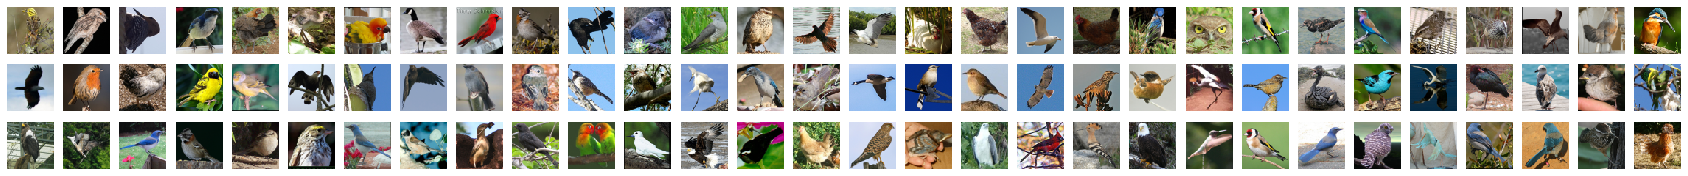

In [92]:
showimages(train_batch,col=True)

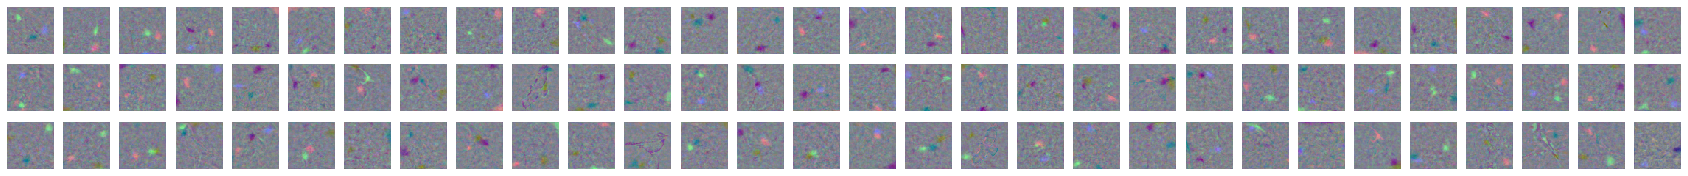

In [108]:
sk_ica = FastICA(n_components=90,algorithm='parallel',fun='logcosh',max_iter=200)

temp0   = sk_ica.fit_transform(train_batch[:90,:,:,0].reshape((90,-1)).T).T.reshape((90,64,64))
temp1   = sk_ica.fit_transform(train_batch[:90,:,:,1].reshape((90,-1)).T).T.reshape((90,64,64))
temp2   = sk_ica.fit_transform(train_batch[:90,:,:,2].reshape((90,-1)).T).T.reshape((90,64,64))
temp    = np.stack((temp0,temp1,temp2),3)
temp[:,:,:,0]    = (temp[:,:,:,0] - temp[:,:,:,0].min()) /(temp[:,:,:,0].max() - temp[:,:,:,0].min() + 1e-8)
temp[:,:,:,1]    = (temp[:,:,:,1] - temp[:,:,:,1].min()) /(temp[:,:,:,1].max() - temp[:,:,:,1].min() + 1e-8)
temp[:,:,:,2]    = (temp[:,:,:,2] - temp[:,:,:,2].min()) /(temp[:,:,:,2].max() - temp[:,:,:,2].min() + 1e-8)
showimages(temp,col=True)

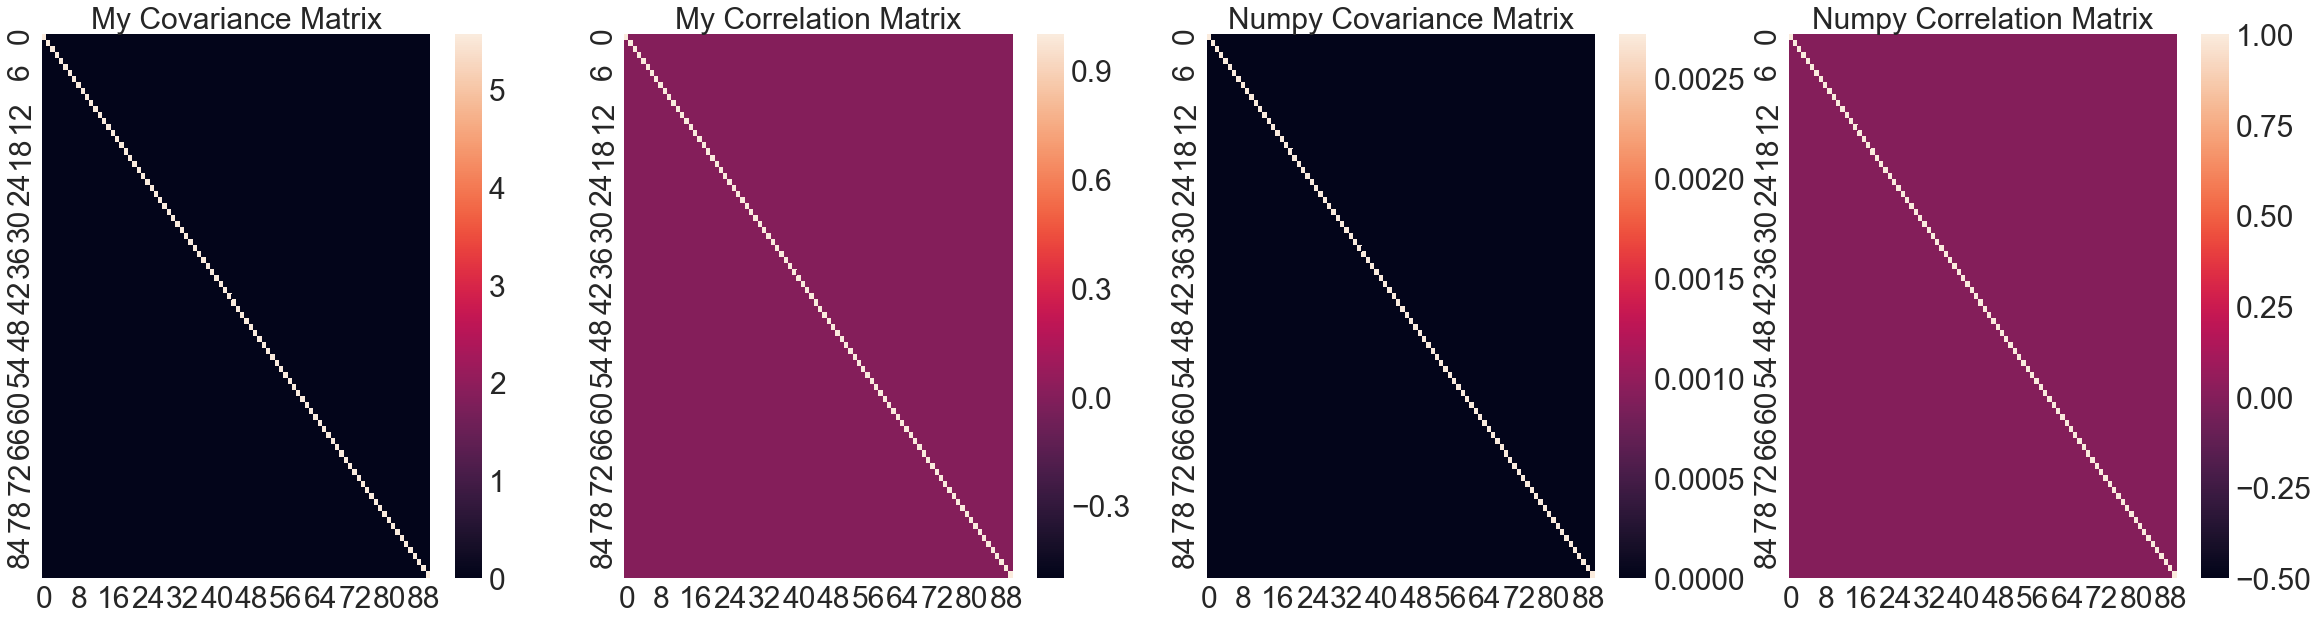

In [109]:
# 
temp = temp[:,:,:,0].reshape((90,-1))
plt.figure(figsize=(40,10))
temp_cen = temp - temp.mean(1)[:,None]
covariance_mat = temp_cen @ temp_cen.T / (dis_all.shape[1])

temp_cen_std = temp_cen / temp_cen.std(1)[:,None]
correlation_mat= temp_cen_std @ temp_cen_std.T / (temp_cen_std.shape[1])
sns.set(font_scale=3.)
plt.subplot(141); sns.heatmap(covariance_mat);   plt.title('My Covariance Matrix',fontsize=30);
plt.subplot(142); sns.heatmap(correlation_mat,vmin=-0.5);  plt.title('My Correlation Matrix',fontsize=30);

plt.subplot(143); sns.heatmap(np.cov(temp));       plt.title('Numpy Covariance Matrix',fontsize=30);
plt.subplot(144); sns.heatmap(np.corrcoef(temp),vmin=-0.5 ); plt.title('Numpy Correlation Matrix',fontsize=30);
plt.show()

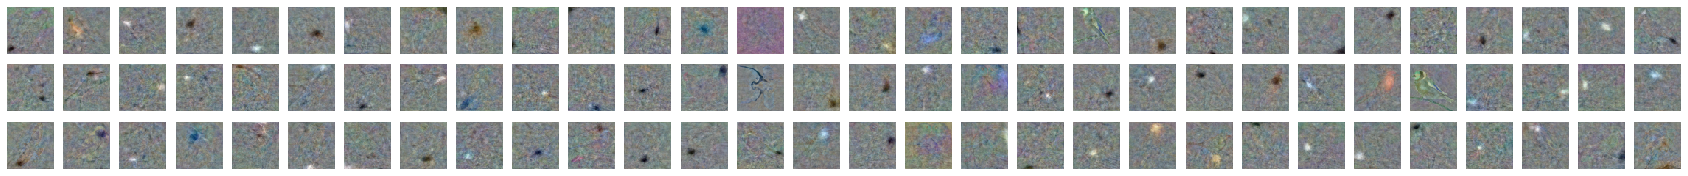

In [112]:
temp_all   = sk_ica.fit_transform(train_batch[:90,:,:,:].reshape((90,-1)).T).T.reshape((90,64,64,3))
temp_all[:,:,:,0]    = (temp_all[:,:,:,0] - temp_all[:,:,:,0].min()) /(temp_all[:,:,:,0].max() - temp_all[:,:,:,0].min() + 1e-8)
temp_all[:,:,:,1]    = (temp_all[:,:,:,1] - temp_all[:,:,:,1].min()) /(temp_all[:,:,:,1].max() - temp_all[:,:,:,1].min() + 1e-8)
temp_all[:,:,:,2]    = (temp_all[:,:,:,2] - temp_all[:,:,:,2].min()) /(temp_all[:,:,:,2].max() - temp_all[:,:,:,2].min() + 1e-8)
showimages(temp_all,col=True)

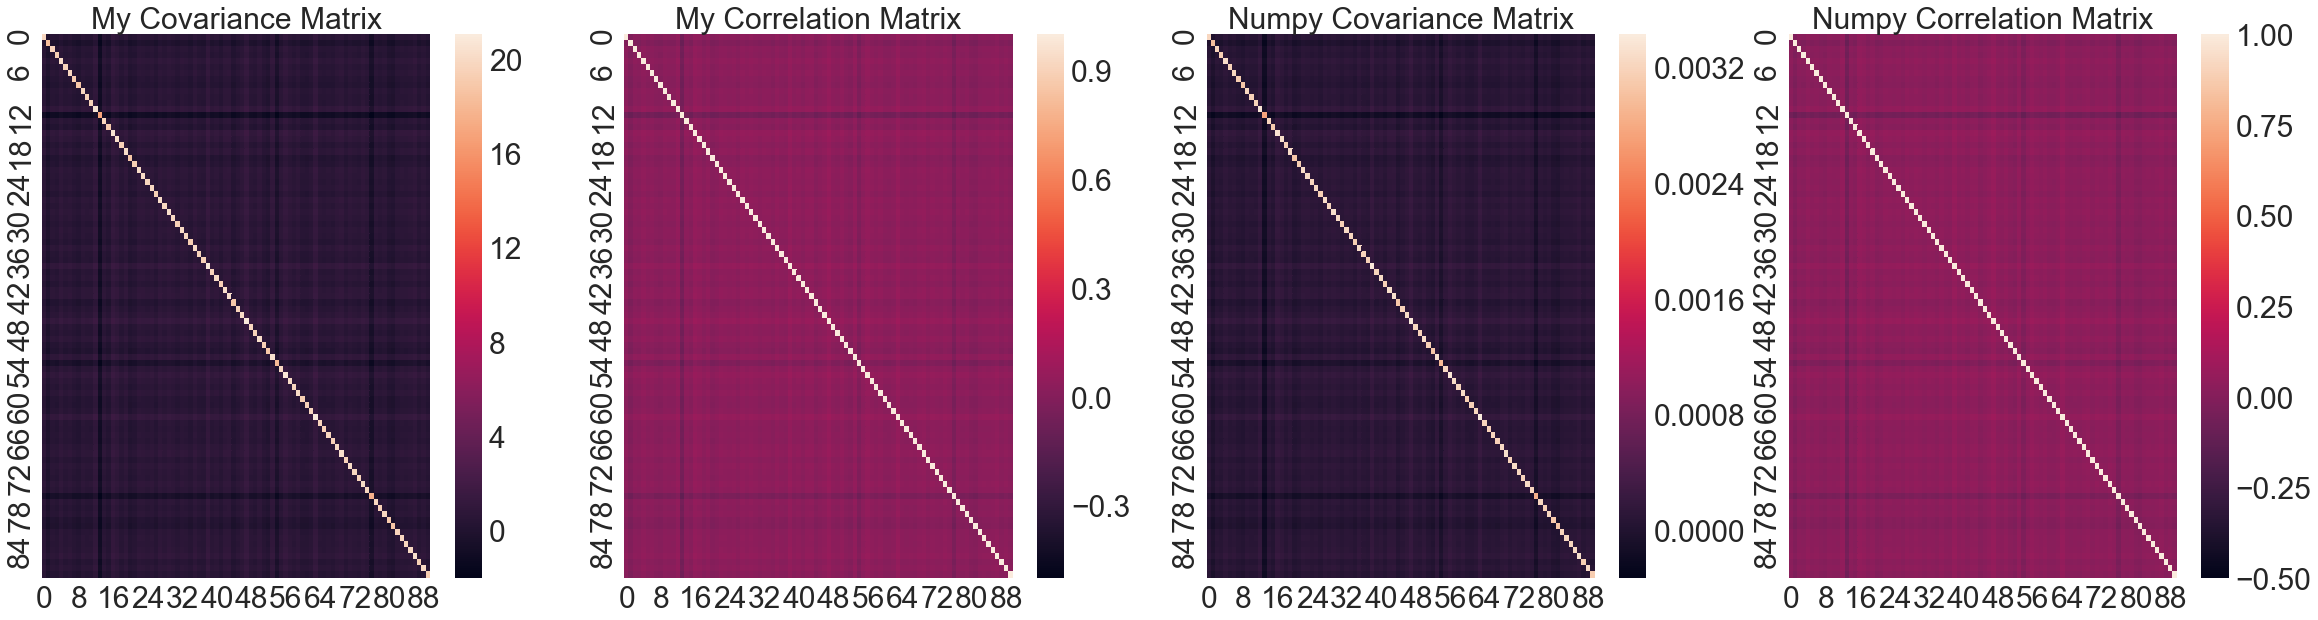

In [113]:
temp = temp_all.reshape((90,-1))
plt.figure(figsize=(40,10))
temp_cen = temp - temp.mean(1)[:,None]
covariance_mat = temp_cen @ temp_cen.T / (dis_all.shape[1])

temp_cen_std = temp_cen / temp_cen.std(1)[:,None]
correlation_mat= temp_cen_std @ temp_cen_std.T / (temp_cen_std.shape[1])
sns.set(font_scale=3.)
plt.subplot(141); sns.heatmap(covariance_mat);   plt.title('My Covariance Matrix',fontsize=30);
plt.subplot(142); sns.heatmap(correlation_mat,vmin=-0.5);  plt.title('My Correlation Matrix',fontsize=30);

plt.subplot(143); sns.heatmap(np.cov(temp));       plt.title('Numpy Covariance Matrix',fontsize=30);
plt.subplot(144); sns.heatmap(np.corrcoef(temp),vmin=-0.5 ); plt.title('Numpy Correlation Matrix',fontsize=30);
plt.show()

In [621]:
def tf_tanh(x): return tf.nn.tanh(x)
def d_tf_tanh(x): return 1 - tf_tanh(x) ** 2
def tf_elu(x):
    """ Exponential Linear Unit based on the ICCV 2015 paper
    https://arxiv.org/pdf/1511.07289.pdf

    Parameters
    ----------
    x : float
        The floating point number that is going to be applied to the ELU activation.

    Returns
    -------
    float
        Data with the same dimensions as the input after ELU

    """
    return tf.nn.elu(x)
def d_tf_elu(x):
    """Derivative of the Exponential Linear Unit base on the ICCV 2015 paper
    https://arxiv.org/pdf/1511.07289.pdf

    Parameters
    ----------
    x : type
        Description of parameter `x`.

    Returns
    -------
    type
        Description of returned object.

    """

    return tf.cast(tf.greater_equal(x,0),tf.float64)  + (tf_elu(tf.cast(tf.less(x,0),tf.float64) * x) + 1.0)

def tf_relu(x): return tf.nn.relu(x)
def d_tf_relu(x): return tf.cast(tf.greater_equal(x,0),tf.float64)

def tf_logcosh(x): return tf.log(tf.cosh(x))
def d_tf_logcosh(x): return tf.tanh(x)
def tf_sigmoid(x): return tf.nn.sigmoid(x)
def d_tf_sigmoid(x): return tf_sigmoid(x) * (1.0-tf_sigmoid(x))
class CNN():

    def __init__(self,k,inc,out,stddev=0.05,which_reg=2.0,act=tf_elu,d_act=d_tf_elu):
        self.w = tf.Variable(tf.random_normal([k,k,inc,out],stddev=stddev,seed=2,dtype=tf.float64))
        self.m,self.v = tf.Variable(tf.zeros_like(self.w)),tf.Variable(tf.zeros_like(self.w))
        self.act,self.d_act = act,d_act
        self.which_reg = which_reg

    def getw(self): return self.w

    def feedforward(self,input,stride=1,padding='VALID'):
        self.input  = input
        self.layer  = tf.nn.conv2d(input,self.w,strides=[1,stride,stride,1],padding=padding)
        self.layerA = self.act(self.layer)
        return self.layerA

    def backprop(self,gradient,stride=1,padding='VALID'):
        grad_part_1 = gradient
        grad_part_2 = self.d_act(self.layer)
        grad_part_3 = self.input

        grad_middle = grad_part_1 * grad_part_2

        grad = tf.nn.conv2d_backprop_filter(input = grad_part_3,filter_sizes = self.w.shape,out_backprop = grad_middle,
            strides=[1,stride,stride,1],padding=padding
        ) / batch_size

        grad_pass = tf.nn.conv2d_backprop_input(input_sizes = [batch_size] + list(grad_part_3.shape[1:]),filter= self.w,out_backprop = grad_middle,
            strides=[1,stride,stride,1],padding=padding
        )

        if self.which_reg == 0:
            grad = grad

        if self.which_reg == 0.5:
            grad = grad + lamda * (tf.sqrt(tf.abs(self.w))) * (1.0/tf.sqrt(tf.abs(self.w)+ 10e-5)) * tf.sign(self.w)

        if self.which_reg == 1:
            grad = grad + lamda * tf.sign(self.w)

        if self.which_reg == 1.5:
            grad = grad + lamda * 1.0/(tf.sqrt(tf.square(self.w) + 10e-5)) * self.w

        if self.which_reg == 2:
            grad = grad + lamda * (1.0/tf.sqrt(tf.square(tf.abs(self.w))+ 10e-5)) * tf.abs(self.w) * tf.sign(self.w)

        if self.which_reg == 2.5:
            grad = grad + lamda * 2.0 * self.w

        if self.which_reg == 3:
            grad = grad + lamda * tf.pow(tf.pow(tf.abs(self.w),3)+ 10e-5,-0.66) * tf.pow(tf.abs(self.w),2) * tf.sign(self.w)

        if self.which_reg == 4:
            grad = grad + lamda * tf.pow(tf.pow(tf.abs(self.w),4)+ 10e-5,-0.75) * tf.pow(tf.abs(self.w),3) * tf.sign(self.w)

        update_w = []
        update_w.append(tf.assign( self.m,self.m*beta1 + (1-beta1) * (grad)   ))
        update_w.append(tf.assign( self.v,self.v*beta2 + (1-beta2) * (grad ** 2)   ))
        m_hat = self.m / (1-beta1)
        v_hat = self.v / (1-beta2)
        adam_middel = learning_rate/(tf.sqrt(v_hat) + adam_e)
        update_w.append(tf.assign(self.w,tf.subtract(self.w,tf.multiply(adam_middel,m_hat)  )))
        return grad_pass,update_w
    
class zca_whiten_layer():

    def __init__(self): pass

    def feedforward(self,input,EPS=10e-5):
        self.input = input
        self.sigma = tf.matmul(tf.transpose(input),input) / input.shape[0].value
        self.eigenval,self.eigvector = tf.linalg.eigh(self.sigma)
        self.U = tf.matmul(tf.matmul(self.eigvector,tf.diag(1./ tf.sqrt(self.eigenval+EPS))),tf.transpose(self.eigvector))
        self.whiten = tf.matmul(input,self.U)
        return self.whiten

    def backprop(self,grad,EPS=10e-5):
        d_U = tf.matmul(tf.transpose(self.input),grad)
        
        # d_eig_value = self.eigvector.T.dot(d_U).dot(self.eigvector) * (-0.5) * np.diag(1. / (self.eigenval+EPS) ** 1.5)
        d_eig_value = tf.matmul(tf.matmul(tf.transpose(self.eigvector),d_U),self.eigvector) * (-0.5) * tf.diag(1./(self.eigenval+EPS) ** 1.5 )
        
        # d_eig_vector = d_U.dot( (np.diag(1. / np.sqrt(self.eigenval+EPS)).dot(self.eigvector.T)).T  ) + (self.eigvector.dot(np.diag(1. / np.sqrt(self.eigenval+EPS)))).dot(d_U)
        d_eig_vector = tf.matmul(d_U,tf.transpose(tf.matmul( tf.diag(1./ tf.sqrt(self.eigenval+EPS)), tf.transpose(self.eigvector)))) + \
                       tf.matmul(tf.transpose(d_U),tf.matmul(self.eigvector,tf.diag(1./ tf.sqrt(self.eigenval+EPS))))

        # E = np.ones((grad.shape[1],1)).dot(np.expand_dims(self.eigenval.T,0)) - 
        #     np.expand_dims(self.eigenval,1).dot(np.ones((1,grad.shape[1])))
        E = tf.matmul(tf.ones([grad.shape[1].value,1],dtype=tf.float64),tf.transpose(self.eigenval)[tf.newaxis,:]) - \
            tf.matmul(self.eigenval[:,tf.newaxis],tf.ones([1,grad.shape[1].value],dtype=tf.float64))

        # K_matrix = 1./(E + np.eye(grad.shape[1])) - np.eye(grad.shape[1])
        K_matrix = 1.0 /( E + tf.eye(grad.shape[1].value,dtype=tf.float64)) - tf.eye(grad.shape[1].value,dtype=tf.float64)

        # np.fill_diagonal(d_eig_value,0.0)
        tf.matrix_set_diag(d_eig_value, tf.zeros(shape=(d_eig_value.shape[0].value),dtype=tf.float64) )

        # d_sigma = self.eigvector.dot(
        #             K_matrix.T * (self.eigvector.T.dot(d_eig_vector)) + d_eig_value
        #             ).dot(self.eigvector.T)
        d_sigma = tf.matmul(tf.matmul(self.eigvector,
                    tf.transpose(K_matrix) * tf.matmul(tf.transpose(self.eigvector),d_eig_vector) + d_eig_value),
                    tf.transpose(self.eigvector))

        # d_x = grad.dot(self.U.T) + (2./grad.shape[0]) * self.input.dot(d_sigma) * 2
        d_x  = tf.matmul(grad,tf.transpose(self.U)) + (2.0/grad.shape[0].value) * tf.matmul(self.input,d_sigma) * 2

        return d_x
    
class FastICA_Layer():

    def __init__(self,inc,outc,act,d_act):
        self.w = tf.Variable(self.sym_decorrelation(tf.random_normal(shape=[inc,outc],stddev=0.05,dtype=tf.float64,seed=2)))
        self.m = tf.Variable(tf.zeros_like(self.w)) ; self.v = tf.Variable(tf.zeros_like(self.w))
        self.act = act; self.d_act = d_act
    def getw(self): return self.w
    def sym_decorrelation(self,matrix):
        s, u = tf.linalg.eigh(tf.matmul(matrix,tf.transpose(matrix)))
        decor_matrx = tf.matmul(u * (1.0/tf.sqrt(s)),tf.transpose(u))
        return tf.matmul(decor_matrx,matrix)
    def getw(self): return self.w
    def feedforward(self,input):
        self.input = input
        self.layer = tf.matmul(self.w,input)
        return self.layer

    def backprop_ica(self):
        self.layerA  = self.act(tf.matmul(self.w,self.input))
        self.layerDA = tf.reduce_mean(self.d_act(tf.matmul(self.w,self.input)),-1)
        grad_pass    = tf.matmul(tf.transpose(self.w),self.layer)

        grad_w = tf.matmul(self.layerA,tf.transpose(self.input)) / self.input.shape[1].value - self.layerDA[:,tf.newaxis] * self.w
        grad   = self.sym_decorrelation(grad_w) / batch_size
        grad_w_score = tf.reduce_mean(
            tf.abs(
                tf.abs(tf.diag(tf.matmul(grad, tf.transpose(self.w) )))-1.)
        )

        update_w = []
        # ==== Correct Method of Weight Update ====
        # update_w.append(tf.assign(self.w,grad))

        # ==== Wrong (gradient ascent) Method of Weight Update ====
        update_w.append(tf.assign( self.m,self.m*beta1 + (1-beta1) * (grad)   ))
        update_w.append(tf.assign( self.v,self.v*beta2 + (1-beta2) * (grad ** 2)   ))
        m_hat = self.m / (1-beta1)
        v_hat = self.v / (1-beta2)
        adam_middle = m_hat *0.1 *learning_rate/(tf.sqrt(v_hat) + adam_e)
        update_w.append(tf.assign(self.w,tf.subtract(self.w,adam_middle )))
        return grad_w_score,grad_pass,update_w

In [622]:
num_iter = 2000; learning_rate = 0.01; batch_size = 10; lamda=0.0
beta1,beta2,adam_e = 0.9,0.999,1e-8

l1 = CNN(3,3,3)
l2 = CNN(3,3,3)
l3 = CNN(3,3,3)
l4 = CNN(3,3,3)

zca= zca_whiten_layer()
ica= FastICA_Layer(batch_size,batch_size,act=tf_logcosh,d_act=d_tf_logcosh)

In [623]:
x = tf.placeholder(shape=[batch_size,64,64,3],dtype=tf.float64)

layer1 = l1.feedforward(x)
layer2 = l2.feedforward(layer1)
layer3 = l3.feedforward(layer2)
layer4 = l4.feedforward(layer3)

final_reshape = tf.reshape(layer4,[batch_size,-1])
zca_layer  = tf.transpose(zca.feedforward(tf.transpose(final_reshape)))
fast_ica   = ica.feedforward(zca_layer)

grad_score,grad_ica,grad_ica_up = ica.backprop_ica()
grad_zca             = tf.transpose(zca.backprop(tf.transpose(grad_ica)))
grad_zca_reshape     = tf.reshape (grad_zca,[batch_size,56,56,3])

grad4,grad4_up = l4.backprop(grad_zca_reshape)
grad3,grad3_up = l3.backprop(grad4)
grad2,grad2_up       = l2.backprop(grad3)
grad1,grad1_up       = l1.backprop(grad2)
grad_update = grad_ica_up + grad4_up + grad3_up + grad2_up + grad1_up

In [ ]:
# sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

train_data_mini = train_batch[:90,:,:,:]
for iter in range(num_iter):
    
    for current_data_index in range(0,len(train_data_mini),batch_size):
        current_data = train_data_mini[current_data_index:current_data_index+batch_size,:,:,:]
        sess_results = sess.run([grad_score,grad_update],feed_dict={x:current_data})
        sys.stdout.write('\r'+str(sess_results[0].mean())); sys.stdout.flush()
    if iter % 10 == 0: print('\n---------------\n')
    train_data_mini = shuffle(train_data_mini)
    

0.9997683088708164
---------------

0.9997576078875722
---------------

0.9997519881755972
---------------

0.9997326835499555

(10, 56, 56, 3)


IndexError: index 10 is out of bounds for axis 0 with size 10

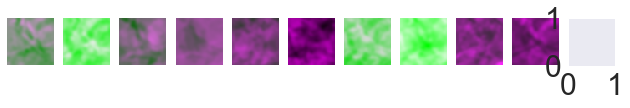

In [616]:
sess_results_final = sess.run(fast_ica,feed_dict={x:train_data_mini[0:batch_size,:,:,:]}).reshape((batch_size,56,56,3))
print(sess_results_final.shape)

sess_results_final[:,:,:,0]    = (sess_results_final[:,:,:,0] - sess_results_final[:,:,:,0].min()) /(sess_results_final[:,:,:,0].max() - sess_results_final[:,:,:,0].min() + 1e-8)
sess_results_final[:,:,:,1]    = (sess_results_final[:,:,:,1] - sess_results_final[:,:,:,1].min()) /(sess_results_final[:,:,:,1].max() - sess_results_final[:,:,:,1].min() + 1e-8)
sess_results_final[:,:,:,2]    = (sess_results_final[:,:,:,2] - sess_results_final[:,:,:,2].min()) /(sess_results_final[:,:,:,2].max() - sess_results_final[:,:,:,2].min() + 1e-8)
showimages(sess_results_final,col=True)

(90, 64, 64, 3)


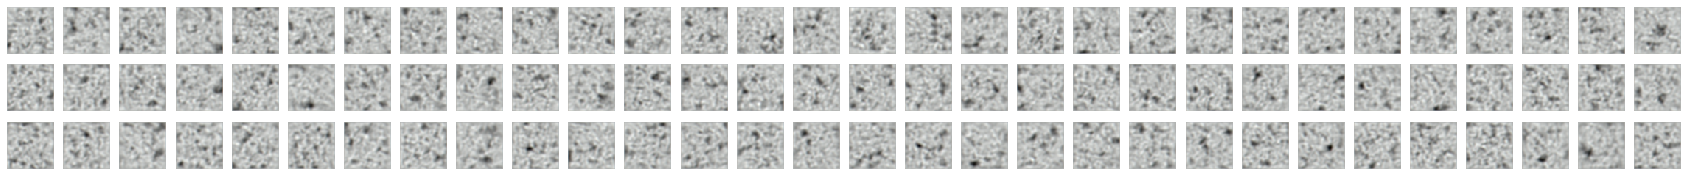

In [334]:
sess_results_final = sess.run(fast_ica,feed_dict={x:train_data_mini}).reshape((90,64,64,3))
print(sess_results_final.shape)

sess_results_final[:,:,:,0]    = (sess_results_final[:,:,:,0] - sess_results_final[:,:,:,0].min()) /(sess_results_final[:,:,:,0].max() - sess_results_final[:,:,:,0].min() + 1e-8)
sess_results_final[:,:,:,1]    = (sess_results_final[:,:,:,1] - sess_results_final[:,:,:,1].min()) /(sess_results_final[:,:,:,1].max() - sess_results_final[:,:,:,1].min() + 1e-8)
sess_results_final[:,:,:,2]    = (sess_results_final[:,:,:,2] - sess_results_final[:,:,:,2].min()) /(sess_results_final[:,:,:,2].max() - sess_results_final[:,:,:,2].min() + 1e-8)
showimages(sess_results_final,col=True)

In [286]:
# # reference
# Holtz, Y. (2017). #92 Control color in seaborn heatmaps. The Python Graph Gallery. Retrieved 21 October 2018, from https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/
# numpy.corrcoef — NumPy v1.15 Manual. (2018). Docs.scipy.org. Retrieved 21 October 2018, from https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.corrcoef.html
# numpy.cov — NumPy v1.15 Manual. (2018). Docs.scipy.org. Retrieved 21 October 2018, from https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.cov.html#numpy.cov
# http://users.stat.umn.edu/~helwig/notes/datamat-Notes.(2018). Users.stat.umn.edu. Retrieved 21 October 2018, from http://users.stat.umn.edu/~helwig/notes/datamat-Notes.pdf
# Covariance Matrix . (2018). Stattrek.com. Retrieved 21 October 2018, from https://stattrek.com/matrix-algebra/covariance-matrix.aspx
# covariance?, H. (2018). How would you explain the difference between correlation and covariance?. Cross Validated. Retrieved 21 October 2018, from https://stats.stackexchange.com/questions/18082/how-would-you-explain-the-difference-between-correlation-and-covariance
# matplotlib, H. (2018). Hide axis values in matplotlib. Stack Overflow. Retrieved 21 October 2018, from https://stackoverflow.com/questions/37039685/hide-axis-values-in-matplotlib/37045694
# plots, H. (2018). Hiding axis text in matplotlib plots. Stack Overflow. Retrieved 21 October 2018, from https://stackoverflow.com/questions/2176424/hiding-axis-text-in-matplotlib-plots